# Simple Logistic regression on the iris dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import datasets
import seaborn as sns

In [2]:
# import some data to play with
iris_ds = datasets.load_iris()
iris = pd.DataFrame(iris_ds.data, columns = iris_ds.feature_names)
display(iris.describe())
# print(iris_ds)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# pd.set_option('display.max_rows', None) # Display the entire Iris dataset
display(iris)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


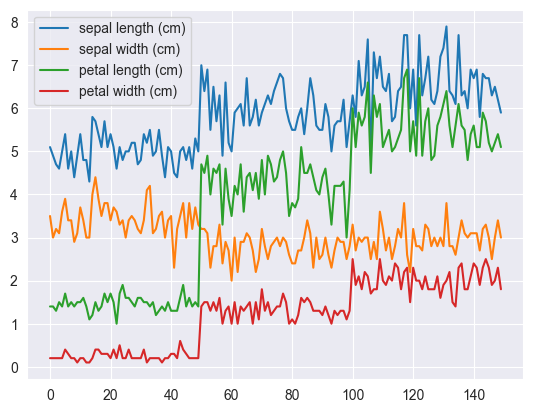

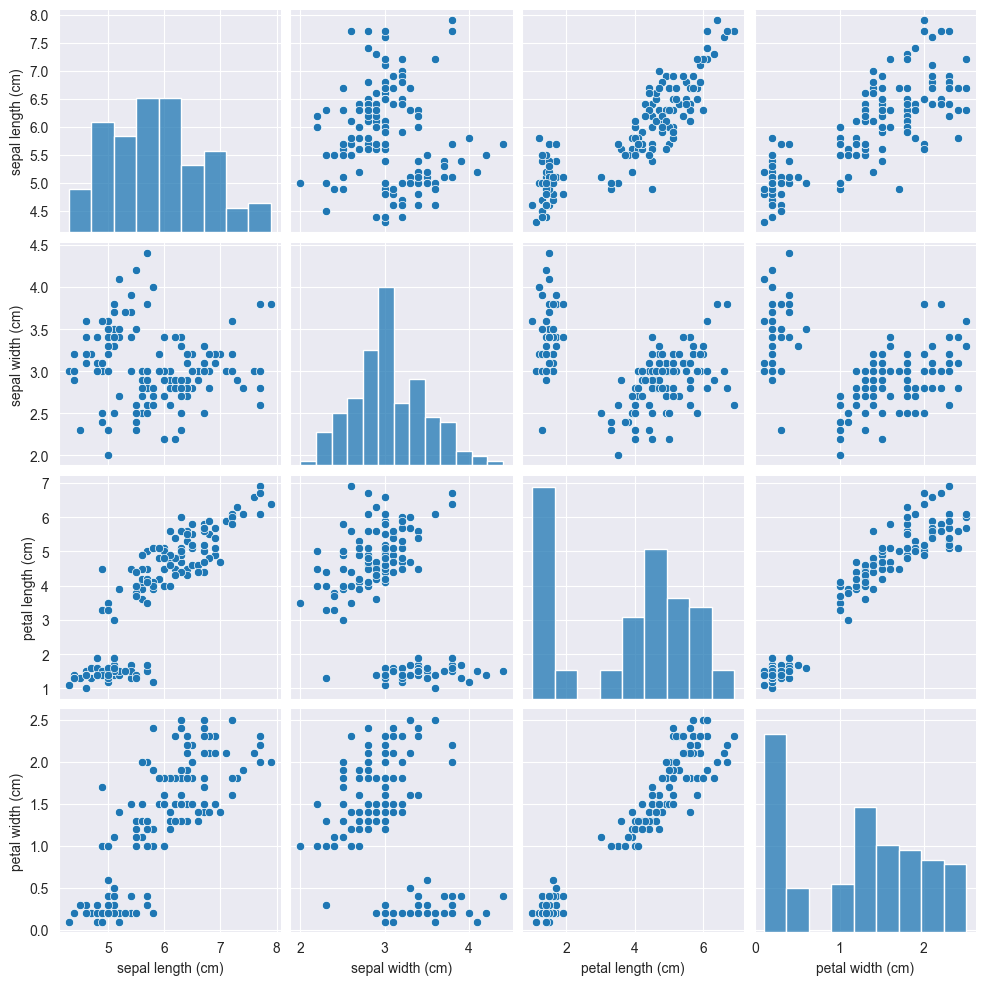

In [4]:
iris.plot()
_ = sns.pairplot(iris)

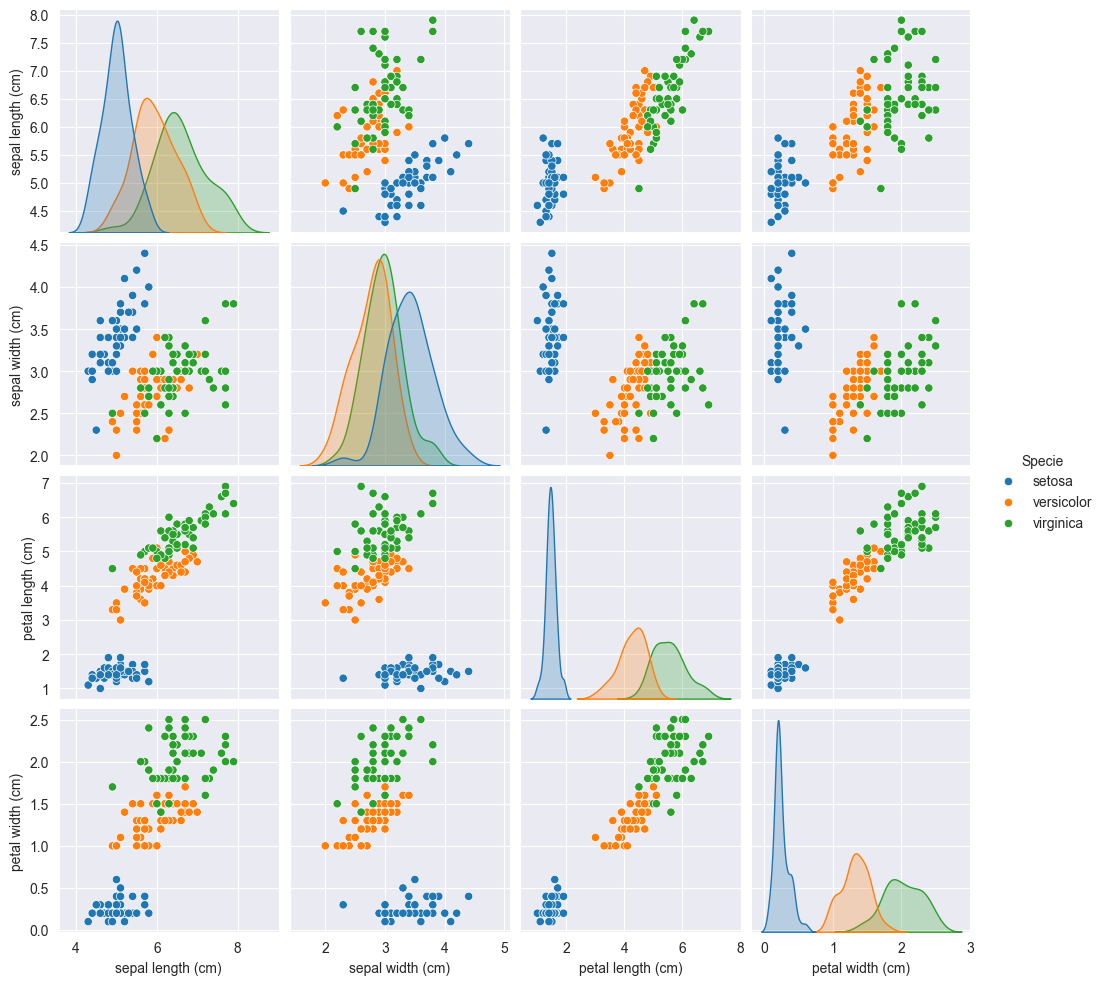

In [5]:
iris2 = iris
iris2['Specie']=iris_ds.target_names[iris_ds.target]
# Alternative command to suppress the function output
# sns.pairplot(iris2, hue="Specie");
_ = sns.pairplot(iris2, hue="Specie")

In [6]:
# sns.boxplot(iris2)

## Simple two class logistic (virginica vs not virginica)

The target variable $y_i$ is equal to $1$ if the corresponding observation refers to virginica and $0$ otherwise

In [7]:
# Split train/test partitions
# let's focus on one attribute only iris_ds.data[:, 3:]

X=iris_ds.data[:, 3:]

Y = np.zeros(len(iris_ds.target))
for i in range(len(Y)):
    if iris_ds.target[i]==2:
        Y[i]=1

(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=.2, shuffle=True)
print(f'{x_train.shape = }\n{y_train.shape = }\n{x_test.shape = }\n{y_test.shape = }')

x_train.shape = (120, 1)
y_train.shape = (120,)
x_test.shape = (30, 1)
y_test.shape = (30,)


In [8]:
sc = StandardScaler()

sc.fit(x_train)

x_train_sc = sc.transform(x_train)  # we only take the petal width feature
x_test_sc = sc.transform(x_test)

*Create an instance of Logistic Regression Classifier and fit the data*

In [9]:
logreg = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
logreg.fit(x_train_sc, y_train)
y_proba = logreg.predict_proba(X)

C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


## predict_proba() returns the probabilities associated with the two possibile outcomes

In [10]:
y_proba

array([[8.13882635e-01, 1.86117365e-01],
       [8.13882635e-01, 1.86117365e-01],
       [8.13882635e-01, 1.86117365e-01],
       [8.13882635e-01, 1.86117365e-01],
       [8.13882635e-01, 1.86117365e-01],
       [6.74185169e-01, 3.25814831e-01],
       [7.50504945e-01, 2.49495055e-01],
       [8.13882635e-01, 1.86117365e-01],
       [8.13882635e-01, 1.86117365e-01],
       [8.64076638e-01, 1.35923362e-01],
       [8.13882635e-01, 1.86117365e-01],
       [8.13882635e-01, 1.86117365e-01],
       [8.64076638e-01, 1.35923362e-01],
       [8.64076638e-01, 1.35923362e-01],
       [8.13882635e-01, 1.86117365e-01],
       [6.74185169e-01, 3.25814831e-01],
       [6.74185169e-01, 3.25814831e-01],
       [7.50504945e-01, 2.49495055e-01],
       [7.50504945e-01, 2.49495055e-01],
       [7.50504945e-01, 2.49495055e-01],
       [8.13882635e-01, 1.86117365e-01],
       [6.74185169e-01, 3.25814831e-01],
       [8.13882635e-01, 1.86117365e-01],
       [5.87355554e-01, 4.12644446e-01],
       [8.138826

## To convert the probailities into classifer outcomes we resort to the argmax() function

In [11]:
print(f'{np.argmax((1,5,2,1)) = }')

dummy = np.array( [[ 1,2,0], [5, 0, 2]] )
print(f'dummy =\n{dummy}')

print(f'{np.argmax(dummy) = }')
print(f'{np.argmax(dummy, axis=0) = }')

np.argmax((1,5,2,1)) = 1
dummy =
[[1 2 0]
 [5 0 2]]
np.argmax(dummy) = 3
np.argmax(dummy, axis=0) = array([1, 0, 1], dtype=int64)


In [12]:
# The axis parameter is used to apply argmax() operator row-wise
print(np.argmax(y_proba, axis=1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


## Evaluate our model

In [13]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = logreg.predict_proba(X_new)

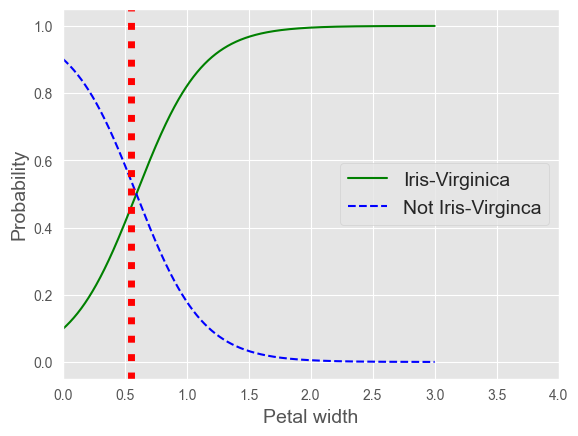

In [14]:
plt.style.use('ggplot')
plt.figure(1)
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.xlim(0,4)
plt.legend(loc="center right", fontsize=14)
plt.axvline(x=0.55, color="red", linewidth=5, linestyle=':')
plt.show()

In [15]:
# theta_0
print(f'{logreg.intercept_ = }')

logreg.intercept_ = array([-2.22370181])


In [16]:
# theta_1
print(f'{logreg.coef_ = }')

logreg.coef_ = array([[3.74131556]])


### Predicting outcomes
 
sklearn classifiers have a predic() method that automatically applies argmax()

classifier accuracy is evaluated with the <A HREF=https://en.wikipedia.org/wiki/Confusion_matrix>confusion matrix</A>


Confusion matrix element $c_{i,j}$ reports the requency of outcomes with true lablel $i$ and predicted label $j$

In [17]:
y_pred = logreg.predict(x_test_sc)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print(cm)

[[19  1]
 [ 1  9]]


## Generic K classes regression

### Now let us to fit a K=3 logistic model using two attributes

## $ \hat{y}_i = \frac{1}{1+e^{\theta_0 +\theta_1 x_{i,1}+\theta_2 x_{i,2}} $

In [18]:

X = iris_ds.data[:, 2:]  # we  take the petal length and width features.
Y = iris_ds.target

(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=.2, shuffle=True)

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)


logreg_ml = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')

logreg_ml.fit(x_train_sc, y_train)

C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='auto', random_state=0)

In [19]:
y_pred = logreg_ml.predict(x_test_sc)

print(f'{y_pred = }')

y_pred = array([2, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,
       2, 2, 2, 0, 1, 1, 1, 1])


In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[11  0  0]
 [ 0 10  1]
 [ 0  1  7]]


## Use an heatmap for nicely plotting the confusion matrix
See: https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

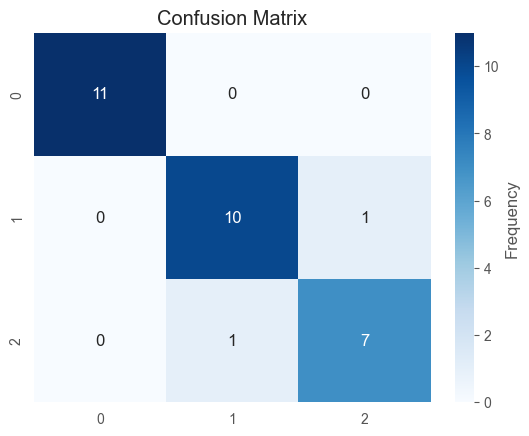

In [21]:
# Plot confusion matrix
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar_kws={'label':'Frequency'}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

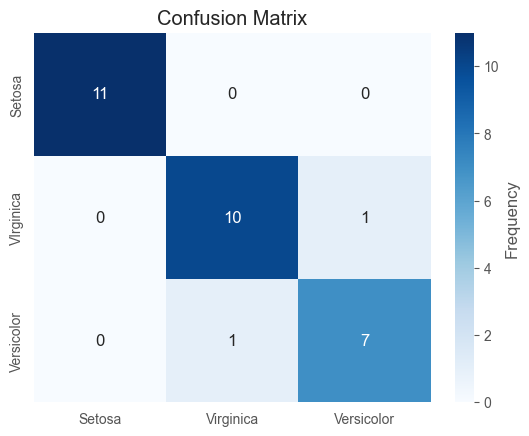

In [22]:
# Plot confusion matrix
# confusion matrix sns heatmap 
ax = plt.axes()
df_cm = pd.DataFrame(cm, columns=('Setosa','Virginica','Versicolor'))
df_cm.index = ['Setosa','VIrginica','Versicolor']
             
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}, cbar_kws={'label':'Frequency'}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
# plt.xlabel("True")
# plt.ylabel('Predicted')
plt.show()

## Try to use the pipelne + KFold approach ...


In [23]:
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict

In [24]:
pipe = make_pipeline(
    # SimpleImputer(missing_values=np.nan, strategy='most_frequent'),
    StandardScaler(),
    LogisticRegression(random_state=42, solver='lbfgs', multi_class='auto', max_iter=500),
    )

kf = KFold(n_splits=5, shuffle=True, random_state=2023)

# Do k-fold cross-validation
cv_results_full = cross_validate(pipe, # Pipeline
                             X, # Feature matrix
                             Y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

# this call returns the test scoring only

cv_results = cross_val_score(pipe, # Pipeline
                             X, # Feature matrix
                             Y, # Target vector
                             cv=kf, # Cross-validation technique
                             scoring="accuracy", # Loss function
                             n_jobs=-1) # Use all CPU scores

In [25]:
cv_results

array([1.        , 0.93333333, 0.96666667, 0.96666667, 0.93333333])

In [26]:
cv_results.mean()

0.96

In [27]:
ypred = cross_val_predict(pipe, X, Y, cv=kf)

C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\lucat\GitHub\AI_LAB\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning

In [28]:
Y.shape, ypred.shape

((150,), (150,))

In [29]:
cm = confusion_matrix(Y, ypred)

cm

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  4, 46]], dtype=int64)

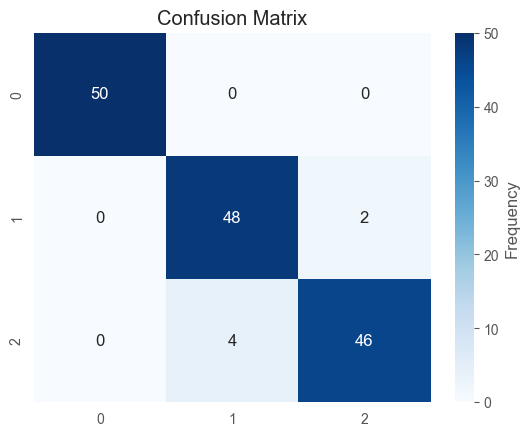

In [30]:
ax = plt.axes()
df_cm = pd.DataFrame(cm, columns=('Setosa','Virginica','Versicolor'))
df_cm.index = ['Setosa','VIrginica','Versicolor']
             
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, cbar_kws={'label':'Frequency'}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
# plt.xlabel("True")
# plt.ylabel('Predicted')
plt.show()